In [1]:
#### Versión del 16/8/2022 ##### 
import pytearcat as pt
import sympy as sy
from sympy import * 

### Metric


In [34]:
t,r,theta,phi = pt.coords('t,r,theta,phi')

A = pt.fun('A','t,r')
B = pt.fun('B','t,r')
C = pt.fun('C','t,r')

rho = pt.fun('rho','t,r')
P = pt.fun('P','t,r')
#Pt = pt.fun('Pt','t,r')
Delta = pt.fun('Delta','t,r')
#Delta=0
F = pt.fun('F','t,r')
E = pt.fun('E','t,r')

Remember that the time coordinate must be the first coordinate.
Function A(t,r) is already defined
Function B(t,r) is already defined
Function C(t,r) is already defined


In [3]:
ds = 'ds2 = -A**2*dt**2 + B**2*dr**2 + C**2 * (dtheta**2 + sin(theta)**2 * dphi**2)'
g = pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-A(t, r)**2,          0,          0,                        0],
[          0, B(t, r)**2,          0,                        0],
[          0,          0, C(t, r)**2,                        0],
[          0,          0,          0, C(t, r)**2*sin(theta)**2]])

### The tetrad: the kinematical variables

Let us choose an orthogonal unitary tetrad:
$$
e^{(0)}_\alpha~=V_\alpha, \quad 
e^{(1)}_\alpha~=K_\alpha, \quad 
e^{(2)}_\alpha~=L_\alpha \quad \mathrm{and}  \quad e^{(3)}_\alpha~=~S_\alpha.
$$


In [4]:
Vu = pt.ten('Vu',1)
Vu.assign([1/A,0,0,0],'^')
Ku = pt.ten('Ku',1)
Ku.assign([0,1/B,0,0],'^')
Lu = pt.ten('Lu',1)
Lu.assign([0,0,1/C,0],'^')
Su = pt.ten('Su',1)
Su.assign([0,0,0,1/(C*sy.sin(theta))],'^')

Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components


In [5]:
Vd = pt.ten('Vd',1)
Vd.assign(Vu("^a")*g("_a,_b"),"_b")
Vd.display('_')

Kd = pt.ten('Kd',1)
Kd.assign(Ku("^a")*g("_a,_b"),"_b")
Kd.simplify()
Kd.display('_')

Ld = pt.ten('Ld',1)
Ld.assign(Lu("^a")*g("_a,_b"),"_b")
Ld.simplify()
Ld.display('_')

Sd = pt.ten('Sd',1)
Sd.assign(Su("^a")*g("_a,_b"),"_b")
Sd.simplify()
Sd.display('_')

Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


Elements assigned correctly to the _b components


In [6]:
unoV = pt.simplify((Vu('^l')*Vd('_l')))
unoK = pt.simplify(-1*Ku('^l')*Kd('_l'))
unoL = pt.simplify(-1*Lu('^l')*Ld('_l'))
unoS = pt.simplify(-1*Su('^l')*Sd('_l'))
[unoV,unoK,unoL,unoS]

In [7]:
cero1 = pt.simplify(-1*Vu('^l')*Kd('_l'))
cero2 = pt.simplify(-1*Vu('^l')*Ld('_l'))
cero3 = pt.simplify(-1*Vu('^l')*Sd('_l'))
cero4 = pt.simplify(-1*Ku('^l')*Sd('_l'))
cero5 = pt.simplify(-1*Ku('^l')*Ld('_l'))
cero6 = pt.simplify(-1*Lu('^l')*Sd('_l'))
[cero1,cero2,cero3,cero4,cero5,cero6]

### Christoffel

In [8]:
Chr= pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

In [9]:
R = pt.riemann(All=True)

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

The first set equations can be considered purely geometrical and emerges from the projection of the Riemann tensor along the tetrad i.e.
$$
2 V_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} V^{\delta}, \quad 2 K_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} K^{\delta}, \quad 2 L_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} L^{\delta} \quad \text { and } \quad 2 S_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} S^{\delta}
$$

In [13]:
DeVddd = pt.ten("DeVddd",3)
DeVddd.assign(R("_delta,_alpha,_beta,_gamma")*Vu("^delta"),"_alpha,_beta,_gamma")
DeVddd.simplify()
#DeVddd.display('_,_,_')
IzVddd = pt.ten("IzVddd",3)
IzVddd.assign((pt.C(pt.C(Vd("_alpha"),"_beta"),"_gamma") - pt.C(pt.C(Vd("_alpha"),"_gamma"),"_beta")),"_alpha,_beta,_gamma")
IzVddd.simplify()
#IzVddd.display('_,_,_')
ceros=pt.ten("ceros",3)
ceros.assign(IzVddd('_alpha,_beta,_gamma')-DeVddd('_alpha,_beta,_gamma') ,"_alpha,_beta,_gamma")
ceros.simplify()
ceros.display('_,_,_')

Elements assigned correctly to the _alpha,_beta,_gamma components
Elements assigned correctly to the _alpha,_beta,_gamma components
Elements assigned correctly to the _alpha,_beta,_gamma components
All components are zero


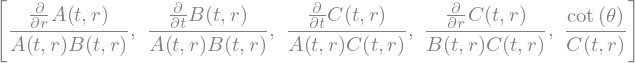

In [20]:
a1= A.diff(r)/(A*B)

sigma1= B.diff(t)/(A*B)
sigma2= C.diff(t)/(A*C)

J1=C.diff(r)/(C*B)
J2=sy.cot(theta)/C
[a1,sigma1,sigma2,J1,J2]

### COVARIANT DERIVATIVE OF $V_{\alpha}$
$$
V_{\alpha ; \beta}
$$


Elements assigned correctly to the _a,_b components


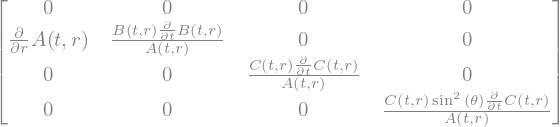

In [11]:
DcVd = pt.ten("DcVd",2)
DcVd_dat = pt.C(Vd("_a"),"_b") 
DcVd.assign(DcVd_dat,"_a,_b")
DcVd.factor()
DcVd.display()
#DcVd.complete('_,_')

In [21]:
DcVdS = pt.ten('DcVdS',2)
DcVdS.assign(-a1*Kd('_alpha')*Vd('_beta')+ sigma1*Kd('_alpha')*Kd('_beta')+ sigma2*(Ld('_alpha')*Ld('_beta')+Sd('_alpha')*Sd('_beta')) ,"_alpha,_beta")
#DcVdS.display('_,_')

Elements assigned correctly to the _alpha,_beta components


Elements assigned correctly to the _mu,_nu components


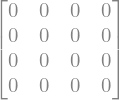

In [22]:
ceros1=pt.ten('ceros1',2)
ceros1.assign(DcVd('_mu,_nu')-DcVdS('_mu,_nu') ,"_mu,_nu")
ceros1.simplify()
ceros1.display('_,_')

$$
a_{\alpha}=V^{\beta} V_{\alpha ; \beta}\,, \quad a_{\alpha;\beta}
$$

Elements assigned correctly to the _a components
Elements assigned correctly to the _a,_b components


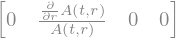

In [51]:
# Aceleracion y su derivada covariante
ad= pt.ten("ad",1)
ad.assign( DcVd("_a,_b")*Vu("^b") ,"_a")
ad.simplify()

Dcad = pt.ten("Dcad",2)
Dcad_dat = pt.C(ad("_a"),"_b") 
Dcad.assign(Dcad_dat,"_a,_b")
Dcad.simplify()
ad.display('_')

$$
\Theta=V_{; \alpha}^{\alpha}
$$

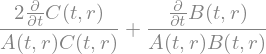

In [58]:
#Expansión
Theta=DcVd('^alpha,_alpha')
display(Theta)

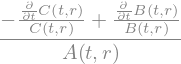

In [59]:
#Shear
sh= 1/A*(B.diff(t)/(B)-C.diff(t)/(C)  )
display(sh)

### COVARIANT DERIVATIVE OF: 
$$
K_{\alpha ; \beta}\,, \quad L_{\alpha ; \beta} \,, \quad S{\alpha ; \beta}
$$

In [23]:
DcKd = pt.ten("DcKd",2)
DcKd_dat = pt.C(Kd("_a"),"_b") 
DcKd.assign(DcKd_dat,"_a,_b")
DcKd.simplify()
DcKdS = pt.ten('DcKdS',2)
DcKdS.assign(-a1*Vd('_alpha')*Vd('_beta')+ sigma1*Vd('_alpha')*Kd('_beta')+ J1*(Ld('_alpha')*Ld('_beta')+Sd('_alpha')*Sd('_beta')) ,"_alpha,_beta")
DcKdS.simplify()
#DcKdS.display('_,_')

DcLd = pt.ten("DcLd",2)
DcLd_dat = pt.C(Ld("_a"),"_b") 
DcLd.assign(DcLd_dat,"_a,_b")
DcLd.simplify()
DcLdS = pt.ten('DcLdS',2)
DcLdS.assign(sigma2*Vd('_alpha')*Ld('_beta')- J1*Kd('_alpha')*Ld('_beta')+ J2*Sd('_alpha')*Sd('_beta') ,"_alpha,_beta")
DcLdS.simplify()
#DcLdS.display('_,_')

DcSd = pt.ten("DcSd",2)
DcSd_dat = pt.C(Sd("_a"),"_b") 
DcSd.assign(DcSd_dat,"_a,_b")
DcSd.factor()
DcSdS = pt.ten('DcSdS',2)
DcSdS.assign(sigma2*Vd('_alpha')*Sd('_beta')- J1*Kd('_alpha')*Sd('_beta')- J2*Ld('_alpha')*Sd('_beta') ,"_alpha,_beta")
DcSdS.simplify()
#DcSdS.display('_,_')


Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _alpha,_beta components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _alpha,_beta components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _alpha,_beta components


Elements assigned correctly to the _mu,_nu components


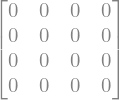

In [24]:
ceros2=pt.ten('ceros2',2)
ceros2.assign(DcKd('_mu,_nu')-DcKdS('_mu,_nu') ,"_mu,_nu")
ceros2.simplify()
ceros2.display('_,_')

Elements assigned correctly to the _mu,_nu components


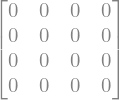

In [25]:
ceros3=pt.ten('ceros3',2)
ceros3.assign(DcLd('_mu,_nu')-DcLdS('_mu,_nu') ,"_mu,_nu")
ceros3.simplify()
ceros3.display('_,_')

Elements assigned correctly to the _mu,_nu components


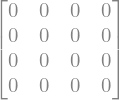

In [26]:
ceros4=pt.ten('ceros4',2)
ceros4.assign(DcSd('_mu,_nu')-DcSdS('_mu,_nu') ,"_mu,_nu")
ceros4.simplify()
ceros4.display('_,_')

### The directional derivatives operators
$$
f^{\bullet}=V^{\alpha} \partial_{\alpha} f \quad f^{\dagger}=K^{\alpha} \partial_{\alpha} f \quad \text { and } \quad f^{*}=L^{\alpha} \partial_{\alpha} f
$$

Elements assigned correctly to the _a components
Elements assigned correctly to the _a components
Elements assigned correctly to the _a components


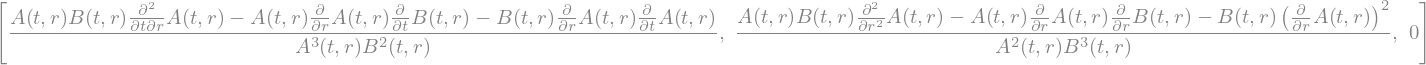

In [31]:
# Derivadas de a1
Da1c= pt.ten('Da1c',1)
Da1c.assign(pt.D(a1,"_a"), "_a")
Da1c.simplify()
Da1cir= Vu('^a')*Da1c('_a') 
Da1cir.simplify()

Da1= pt.ten('Da1',1)
Da1.assign(pt.D(a1,"_a"), "_a")
Da1.simplify()
Da1dag= Ku('^a')*Da1('_a') 
Da1dag.simplify()

Da1es= pt.ten('Da1est',1)
Da1es.assign(pt.D(a1,"_a"), "_a")
Da1es.simplify()
Da1est= Lu('^a')*Da1es('_a') 
Da1est.simplify()

[Da1cir, Da1dag, Da1est]

$$
h_{\mu\nu}=g_{\mu\nu} +V_\mu V_\nu = K_\mu K_\nu+L_\mu L_\nu+S_\mu S_\nu
$$

Elements assigned correctly to the _mu,_nu components


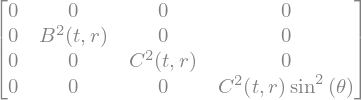

hdd Tensor $hdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [32]:
hdd=pt.ten('hdd',2)
hdd.assign(g("_mu,_nu")+Vd('_mu')*Vd('_nu') ,"_mu,_nu")
hdd.simplify()
hdd.display('_,_')
hdd.complete('_,_')
hdd.simplify()

## The energy momentum tensor
$$
{T}_{\alpha\beta}= (\rho+P) V_\alpha V_\beta+P g _{\alpha \beta} +\Pi_{\alpha \beta}+\mathcal{F}_\alpha V_\beta+\mathcal{F}_\beta V_\alpha .
$$

$$
\mathcal{F}_{\mu}=\mathcal{F} K_{\mu}
$$

In [41]:
Fd=pt.ten('Fd',1)
Fd.assign(F*Kd('_mu') ,"_mu")
Fd.simplify()
Fd.display('_')
Fd.complete('_')

Elements assigned correctly to the _mu components


Fd Tensor $Fd{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$
\mathcal{F}^{\mu} V_{\mu}=0
$$

In [37]:
Fd("^mu")*Vd("_mu")

Elements assigned correctly to the _alpha,_beta components


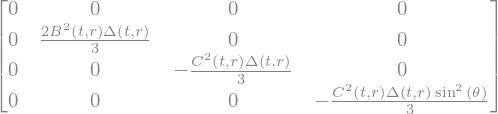

In [42]:
PI=pt.ten('PI',2)
PI.assign(Delta*(Kd("_alpha")*Kd("_beta")-hdd("_alpha,_beta")/3) ,"_alpha,_beta")
PI.simplify()
PI.display('_,_')

Elements assigned correctly to the _mu,_nu components


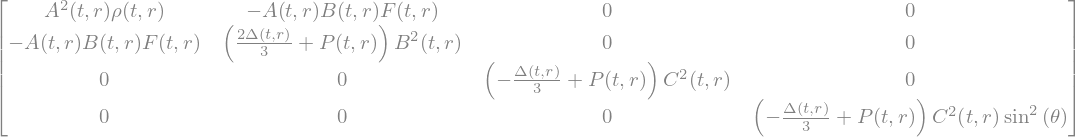

In [43]:
T = pt.ten('T',2)
T.assign((rho+P)*Vd("_mu")*Vd("_nu")+P*g("_mu,_nu")+PI("_mu,_nu")+Fd("_mu")*Vd("_nu")+Fd("_nu")*Vd("_mu") ,"_mu,_nu")
T.simplify()
T.display('_,_')

In [44]:
T.complete('_,_')
T.simplify()

T Tensor $T{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [45]:
T("_mu,_nu")*Vu('^mu')*Vu('^nu')

In [46]:
Fdp=pt.ten('Fdp',1)
Fdp.assign(-rho*Vd('_mu') -T("_mu,_nu")*Vu('^nu') ,"_mu")
Fdp.simplify()
Fdp.display('_')

Elements assigned correctly to the _mu components


In [47]:
hdd("^mu,^nu")*T("_mu,_nu")/3

In [48]:
(2*Ku('^alpha')*Ku('^beta') + Lu('^alpha')*Lu('^beta') )*T("_alpha,_beta")

In [60]:
Ric = pt.ricci()
Ric.complete('_,_')

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

## The splitting of the Riemann tensor and structure scalars

A set of scalar functions --the structure scalars--  obtained from the orthogonal splitting of the Riemann tensor


We can express the splitting of the Riemann tensor as:
$$
R_{\alpha \beta \mu \nu}=2V_\mu V_{[\alpha}Y_{\beta] \, \nu}+2h_{\alpha[\nu}X_{\mu] \,  \beta}+2V_\nu V_{[\beta}Y_{\alpha] \, \mu}
+ h_{\beta\nu}(X_0 \, h_{\alpha\mu}-X_{\alpha\mu})+h_{\beta\mu}(X_{\alpha\nu} -X_0 \, h_{\alpha\nu})
$$

$$
 + 2V_{[\nu} Z_{ \, \mu]}^{\gamma}\varepsilon_{{\alpha \beta \gamma}} +2V_{[\beta} Z_{{\,  \ \alpha]}}^{{\gamma }}\ \varepsilon_{{\mu \nu \gamma}} \,,
$$

with $\varepsilon_{\mu \nu \gamma} = \eta_{\phi \mu \nu \gamma} V^{\phi}$, and  $ \eta_{\phi \mu \nu \gamma}$ the Levi-Civita 4-tensor. 
